# I am broken! Please fix me! 🤖🔧

#### Dear human,
#### I am a jupyter notebook, and my purpose is to teach image processing in Python *bip*
#### Like you, I have cells, but they are not working properly, returning weird error messages *bip* *bip* *bip* 
#### Thus, I cannot fullfil my purpose *bip*

### Can you help me fix myself?

___
<font color='green'><b>I have some guesses about the solutions! I left these suggestions between two bars, like here, to guide you!</b></font>

<font color='green'><b>A useful tip for you before you proceed: activate Line Numbers! Click on 'View' menu and 'Show Line Numbers'.</b></font>
___

Here are the steps I would like to teach you:

    1. Open sample images from the Image Data Repository;
    2. Background correction;
    3. Image segmentation;
    4. Cell counting;
    5. Save processed images.

## 1. Open sample images from the [Image Data Repository](https://idr.openmicroscopy.org/)

Let's start by importing the libraries we will use here.

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pyclesperanto_prototype as cle
import pandas as pd
from skimage.io import imread, imsave
from skimage.measure import regionprops_table

First, I would like to point out that, besides local images, we can open images from the internet by providing their url:

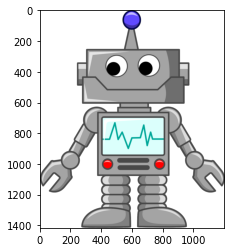

In [2]:
# Read image
image = imread('https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Cartoon_Robot.svg/1200px-Cartoon_Robot.svg.png')

# Display image
plt.imshow(image)
plt.show()

In [3]:
And here is the link to the dataset we will work on:

  https://idr.openmicroscopy.org/webclient/?show=dataset-1226
  
  "YDA141_AGA1y_FIG1r_kss1D_PheromoneTreatment" from "Timing of gene expression in a cell-fate decision system." by "Aymoz D, Solé C, Pierre JJ, Schmitt M, de Nadal E, Posas F, Pelet S" under CC BY 4.0 (https://creativecommons.org/licenses/by/4.0/legalcode)

SyntaxError: invalid syntax (2060955897.py, line 1)

___
<font color='green'><b>I think the cell above is of the wrong type. It should be 'Markdown'.</b></font>
___

The dataset is organized in several folder with 5 images. Below, we is the url of the second image.

In [4]:
image_url = "https://idr.openmicroscopy.org/webclient/render_image/3491627/"

For performance purposes, we are also sub-sampling the image by a factor of 4.

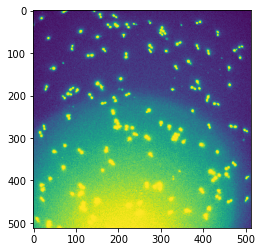

In [5]:
# Read image, converting it to grayscale
image = imread(image_url, as_gray=True)
# Sub-sample image
image_sub = image[::4,::4]
# Display current image
plt.imshow(image_sub)
plt.show()

___
<font color='green'><b>Wait *bip* why does this image have colors? Didn't we just open it 'as_gray'?</b></font>

<font color='green'><b>I remember 'plt.imshow' has an optional parameter called 'cmap' (colormap) that can be set to 'grays'.</b></font>
___

# 2. Background correction

This image has an uneven background. Let's correct it with [pyclesperanto](https://github.com/clEsperanto/pyclesperanto_prototype) [*top_hat_sphere* filter](https://biapol.github.io/blog/ryan_savill/03_background_subtraction/).

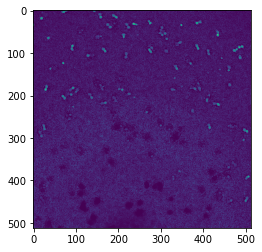

In [21]:
radius = 3
# Remove background
image_fixed_bg = cle.top_hat_sphere(image_sub, radius_x = radius, radius_y = radius)
    
# Display current image
plt.imshow(image_fixed_bg)
plt.show()

___
<font color='green'><b>Ooops, it seems we erased everything. We have to find a better radius value.</b></font>
___

# 3. Image segmentation

Then, we will use *[voronoi_otsu_labeling](https://haesleinhuepf.github.io/BioImageAnalysisNotebooks/20_image_segmentation/11_voronoi_otsu_labeling.html#how-does-it-work)* to segment cells and generate a lalebed image.

In [20]:
# label elements
labeled_image = cle.voronoi_otsu_labeling(image_fixed_bg, spot_simag = 1, outline_sigma = 1)

# Display current image
plt.imshow(image_fixed_bg)
plt.show()

TypeError: got an unexpected keyword argument 'spot_simag'

___
<font color='green'><b>The function does not understand 'spot_simag'. I would check which are the function parameters.</b></font>
___

___
<font color='green'><b>Still, why don't we have labeled images?</b></font>

<font color='green'><b>  - Were the values of the parameters bad choices?</b></font>

<font color='green'><b>  - Is it a plot problem?</b></font>

<font color='green'><b>  - Is the function voronoi_otsu_labeling not working?</b></font>
___

Image visualization is important! The [colormaps](https://matplotlib.org/stable/gallery/color/colormap_reference.html) (or Lookup tables) from matplotlib are not very good for visualizing labeled images.

We will then use *imshow* from pyclesperanto to visualize our labeled images. We can now distinguish labeled cells better (check the figures below)!

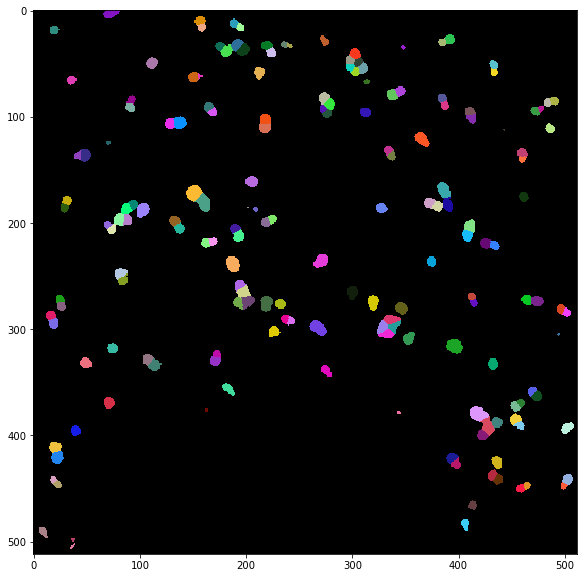

In [9]:
# Display labeled image
plt.figure(figsize = (10,10))
cle.imshow(labeled_image, labels=True)

Additionally, we can plot the labeled image on top of the original image by plotting them together and changing the transparency of the one on top by means of the `alpha` parameter.

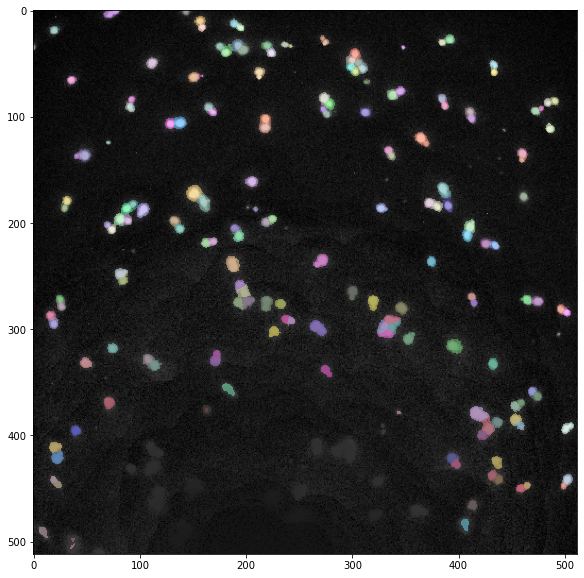

In [10]:
# Display current image and semi-transparent labeled image
plt.figure(figsize = (10,10))
plt.imshow(image_fixed_bg, cmap = 'gray')
cle.imshow(labeled_image, labels=True, alpha=0.4)

# 4. Cell counting

We can use *amax* from *numpy* to count cells.

In [11]:
# Count elements
labeled_image_max_value = np.amax(labeled_image)
print(labeled_image_max_value)

174.0


___
<font color='green'><b> Why do we use the maximal value of a labeled image to count cells?</b></font>
___

# 5. Save processed images.

We wanto to save the processed image in the Desktop and give it the same id as the original: `3491627`.

So, let's define the path to the Desktop and a variable `image_id` containing 

In [12]:
root = r'C:\Users\mazo260d\Desktop' # <--- **CHANGE THIS FIELD TO YOUR DESKTOP PATH**
image_id = 3491627

The file name will be a combination of 'labeled_image' plus the `image_id` plus the image extension ('.tif').

In [19]:
file_name = 'labeled_image_' + image_id + '.tif'

TypeError: can only concatenate str (not "int") to str

___
<font color='green'><b>The variable 'image_id' should be a string, not an integer. How can I convert an integer to string in Python?</b></font>
___

We can dicrectly save the labeled image with *imsave*.

In [14]:
# joins 'root' address with 'file_name'
labeled_image_path = os.path.join(root, file_name)
# saves 'labeled_image' at 'labeled_image_path'
imsave(labeled_image_path, labeled_image)

C:\Users\mazo260d\AppData\Local\Temp\ipykernel_17480\3223154739.py:4: UserWarning: C:\Users\mazo260d\Desktop\labeled_image_3491627.tif is a low contrast image
  imsave(labeled_image_path, labeled_image)


We can also save the current displayed image with *plt.savefig* function.

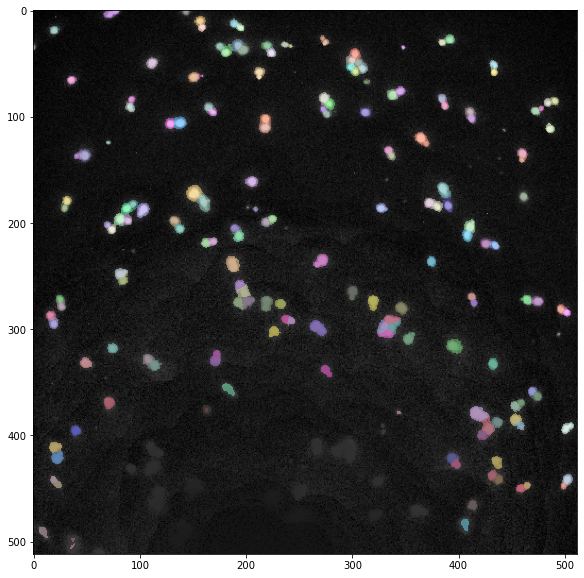

In [18]:
# Display current image and semi-transparent labeled image
plt.figure(figsize = (10,10))
plt.imshow(image_fixed_bg, cmap = 'gray')
cle.imshow(labeled_image, labels=True, alpha=0.4, continue_drawing=True)
# Saves current displayed image
file_name = 'displayed_image_' + str(image_id) + '.tif'
plotted_image_path = os.path.join(root, file_name)
plt.savefig(plotted_image_path)

___
<font color='green'><b>Take a look at the 2 types of image you saved. What are the differences between them?</b></font>

<font color='green'><b>Which one should be used for further processing?</b></font>
___

# Exercise
- Put this workflow in a custom function that opens an image (remember to sub-sample the image), count cells and saves the processed image in a local folder;

In [ ]:
def my_function(image_url, output_path):
    # Write your code here

Then you can test your function with:

In [ ]:
image_url = "https://idr.openmicroscopy.org/webclient/render_image/3491627/"
root = r'C:\Users\mazo260d\Desktop' # <--- **CHANGE THIS FIELD TO YOUR DESKTOP PATH**

my_function(image_url, root)

- Advanced (optional): Execute the function over the 5 images of the repository
  - Tip: replace the red commented code below by your function

In [ ]:
generic_image_url = "https://idr.openmicroscopy.org/webclient/render_image/{image_id}/"
# starting ID
first_image_id = 3491626

for i in range(5):
    # updates image_id
    current_image_id = first_image_id + i
    # Combine generic url with image ID
    image_url = generic_image_url.format(**{"image_id":current_image_id})
    
    """"
    Edit this part with your function, something like:
    
    my_function(image_url, output_path)
    
    """"
    